# `SLiM` Output Analysis

In [50]:
"""
Plots $\mu / s $ vs. $\bar{f}$ and $R(d)$ for specified parameter values
"""

'\nPlots $\\mu / s $ vs. $\x08ar{f}$ and $R(d)$ for specified parameter values\n'

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from numpy import genfromtxt
%matplotlib inline

## Functions to parse `SLiM` outputs for replicate simulations

### Define $outputparse()$ to collect `SLiM` output file names with $glob()$ 

In [52]:
def outputparse(output_dir, nameflag):
    allslimoutputfile = glob.glob(output_dir)
    slimoutputfile = []
    for i in range(len(allslimoutputfile)):
        if len(allslimoutputfile[i].split(nameflag)) > 1:
            slimoutputfile.append(allslimoutputfile[i])
    return slimoutputfile

### Define $int\_or\_float()$ to test for int or float from string

In [53]:
def int_or_float(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

### Define $paramgrab()$ to grab simulation parameters from filename

In [54]:
def paramgrab(filename):
    paramnames = ["_numdemes_","_demepopsize_","_m_","_mu_","_s_"]
    paramvals = np.zeros(len(paramnames))
    for i in range(len(paramnames)):
        paramvals[i] = int_or_float(filename.split(paramnames[i])[1].split("_")[0])
    paramvals[0] = int(paramvals[0])
    paramvals[1] = int(paramvals[1])
    global numdemes, demepopsize, m, mu, s
    numdemes, demepopsize, m, mu, s = paramvals
    return paramvals

### Collect filenames from freqvecreps .csv in slimoutputfiles

In [79]:
output_dir = "../../data/outputfiles/freqvecreps/freqvecreps_numdemes*"
# nameflag = "100218twentyfivedemerun"
nameflag = "092718run"

slimoutputfiles = outputparse(output_dir,nameflag)

In [80]:
genfromtxt(slimoutputfiles[0],delimiter=",").shape

(5, 25)

## Data visualization

### Plot $\bar{f}$ vs. ${\mu}/{s}$ 

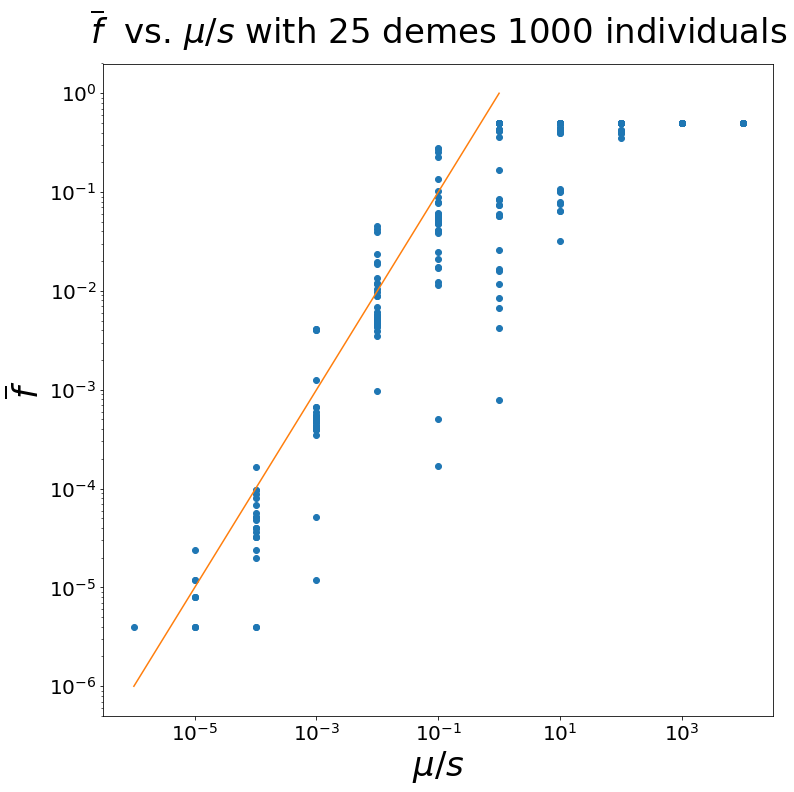

In [21]:
### Reading in freqvecreps .csv with row = numrep, col = numdemes
# Calculate $\bar{f}$ across demes and then reps
# Pull mut_sel ratios from filenames and plot with favg

mutsel_ratio = np.zeros(len(slimoutputfiles))
favg = np.zeros(len(slimoutputfiles))

fig = plt.figure(figsize=(12,12))
for i in range(len(slimoutputfiles)):
    numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#     print(mu,s)
    df = genfromtxt(slimoutputfiles[i],delimiter=",")
#     print(df)
    favg[i] = np.mean(np.mean(df,axis=0),axis=0)
    mutsel_ratio[i] = abs(mu/s)
# print(favg)
# print(mutsel_ratio)
plottitle = ("$\overline{f}$  vs. ${\mu}/{s}$ with %d demes %d individuals"%(int(numdemes),int(demepopsize)))             
plt.plot(mutsel_ratio,favg,"o")
plt.yscale("log")
plt.xscale("log")
plt.title(plottitle,fontsize = 34,pad=20)
plt.xlabel("${\mu}/{s}$", fontsize = 34)
plt.ylabel("$\overline{f}$", fontsize=34)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.loglog([1e-06,1],[1e-06,1])
filename = ("avgfreq_musel_numdemes_%d_demepopsize%d_nameflag_%s.eps"%(numdemes,demepopsize,nameflag))
fig.savefig("../../data/figures/"+filename,format="eps",dpi=1000)

### Define covariance $R(f)$ for mutant allele frequencies in data frame $df$

In [8]:
# df is a data frame of SLiM frequency vectors with replicates along numpy axis 0 
def R(df):   
    correlations = np.zeros((df.shape[0],df.shape[1]+1))
    for i in range(df.shape[0]):
        x = df[i]
        y = np.concatenate([x,x])
        correlations[i] = np.correlate(y,x) / x.size
    avgcorr = np.mean(correlations,axis=0) - np.square(np.mean(df))
    return avgcorr

## Separate runs with specified $\frac{\mu}{s}$ and $\frac{m}{s}$ ratios, calculate R(d) and favg

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

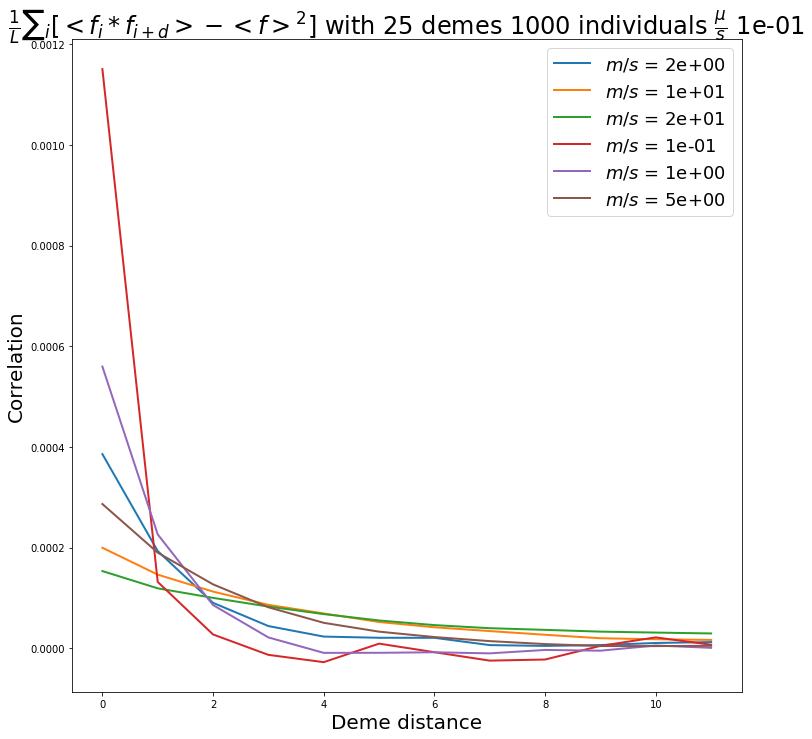

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [29]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
ratio = np.power([10]*9,np.append([2,1],np.arange(0,7,1)))
ratio = np.append(ratio[0:3],1/ratio[3:])

            
for j in range(len(ratio)):
    fig = plt.figure(figsize=(12,12))
    for i in range(len(slimoutputfiles)):
        numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
        df = genfromtxt(slimoutputfiles[i],delimiter=",")
        if abs(mu/s) == ratio[j]:
            Rvec = R(df) 
            plotlabel = (r"$m/s$ = %.e"%(abs(m/s)))
            plottitle = (r"$\frac{1}{L}\sum{_i}{[<f_i*f_{i+d}> - <f>^2]}$ with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
            plt.plot(np.arange(numdemes//2),Rvec[:len(Rvec[:-1])//2],label = plotlabel, lw=2)
            plt.title(plottitle, fontsize=24)
            plt.legend(fontsize=18)
            plt.xlabel("Deme distance", fontsize = 20)
            plt.ylabel("Correlation", fontsize=20)
            filename = ("Cov_distance_plot_musel_%.e_ms_%.e_.png"%(mu/s,abs(m/s)))
#               fig.savefig("../../data/figures/"+filename)
        else:
            continue
            
        

### f vs. demes for various $\mu/s$

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

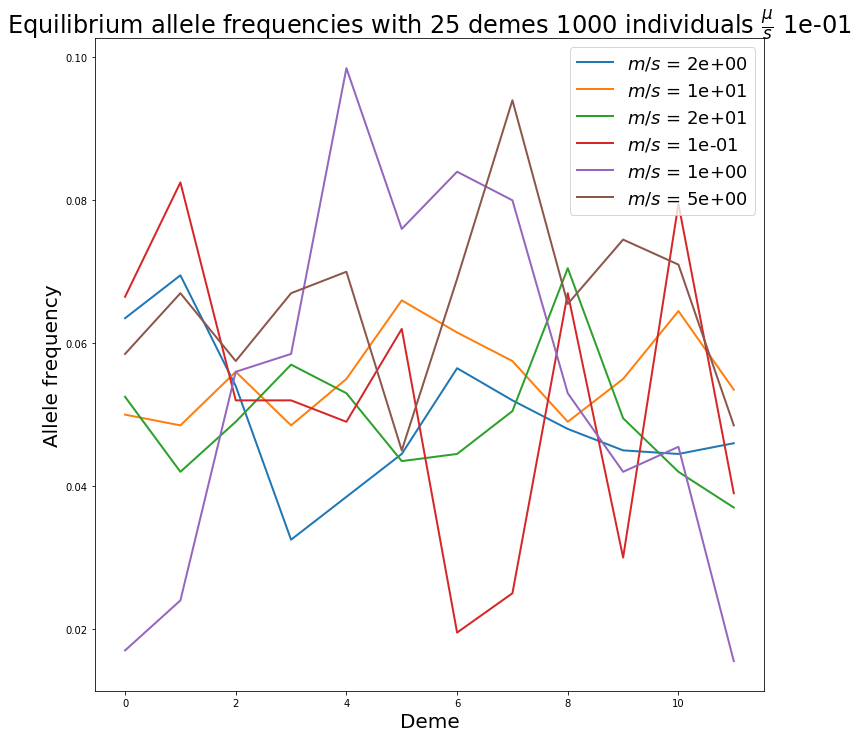

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [30]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
ratio = np.power([10]*9,np.append([2,1],np.arange(0,7,1)))
ratio = np.append(ratio[0:3],1/ratio[3:])

            
for j in range(len(ratio)):
    fig = plt.figure(figsize=(12,12))
    for i in range(len(slimoutputfiles)):
        numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
        df = genfromtxt(slimoutputfiles[i],delimiter=",")
        if abs(mu/s) == ratio[j]:
            Rvec = df[0] 
            plotlabel = (r"$m/s$ = %.e"%(abs(m/s)))
            plottitle = (r"Equilibrium allele frequencies with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
            plt.plot(np.arange(numdemes//2),Rvec[:len(Rvec[:-1])//2],label = plotlabel, lw=2)
            plt.title(plottitle, fontsize=24)
            plt.legend(fontsize=18)
            plt.xlabel("Deme", fontsize = 20)
            plt.ylabel("Allele frequency", fontsize=20)
            filename = ("Freq_distance_plot_musel_%.e_ms_%.e_.png"%(mu/s,abs(m/s)))
#   fig.savefig("../../data/figures/"+filename)
        else:
            continue

In [38]:
np.mean(df)

0.051145

### Correlation vs. $m/s$

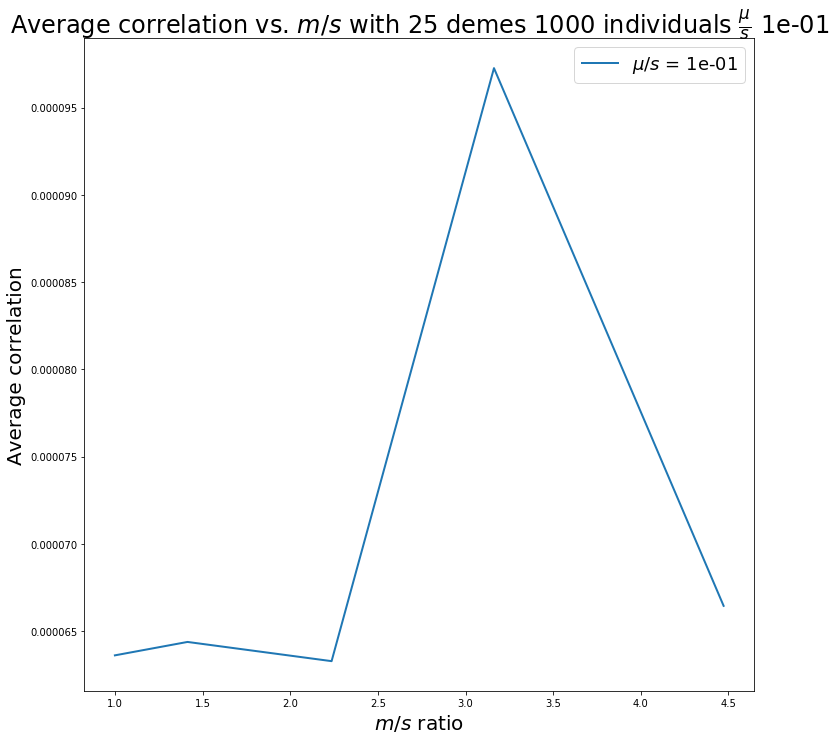

In [31]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
## For m/s
ratio = np.sqrt([1,2,5,10,20])
mutsel = 0.1
Ravg = []

fig = plt.figure(figsize=(12,12))
for i in range(len(slimoutputfiles)):
    numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
    if abs(mu/s) == mutsel:
        df = genfromtxt(slimoutputfiles[i],delimiter=",")   
        Rvec = R(df)
        Ravg.append(np.mean(Rvec))
        if len(Ravg) == len(ratio):
            plotlabel = (r"$\mu/s$ = %.e"%(abs(mu/s)))
            plottitle = (r"Average correlation vs. $m/s$ with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
            plt.plot(ratio,Ravg,label = plotlabel, lw=2)
            plt.title(plottitle, fontsize=24)
            plt.legend(fontsize=18)
            plt.xlabel("$m/s$ ratio", fontsize = 20)
            plt.ylabel("Average correlation", fontsize=20)
            filename = ("Avg_corr_plot_musel_%.e_ms_%.e_.png"%(mu/s,abs(m/s)))
        #   fig.savefig("../../data/figures/"+filename)

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

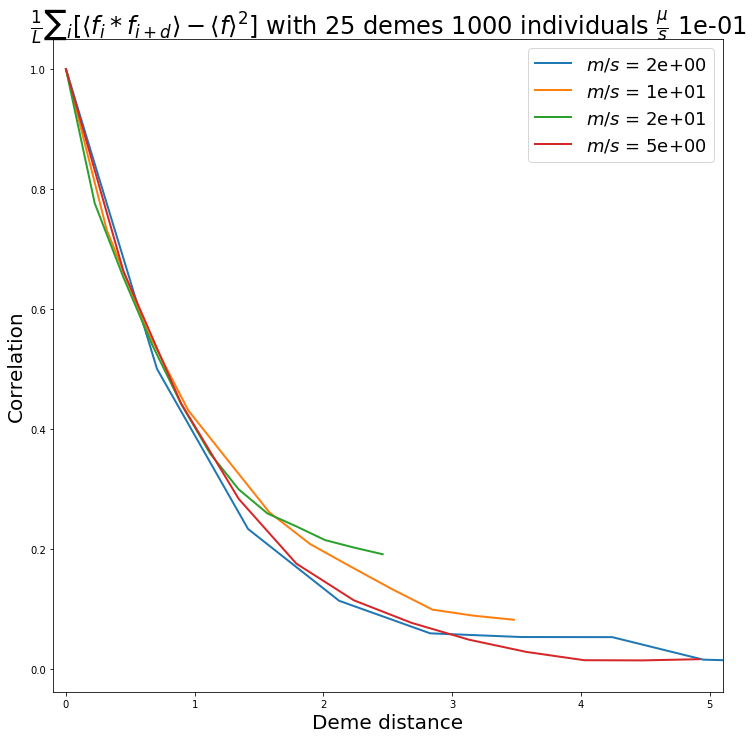

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [33]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
ratio = np.power([10]*9,np.append([2,1],np.arange(0,7,1)))
ratio = np.append(ratio[0:3],1/ratio[3:])

            
for j in range(len(ratio)):
    fig = plt.figure(figsize=(12,12))
    for i in range(len(slimoutputfiles)):
        numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
        df = genfromtxt(slimoutputfiles[i],delimiter=",")
        if abs(mu/s) == ratio[j]:
            if abs(m/s) > 1:
                Rvec = R(df)
                plotlabel = (r"$m/s$ = %.e"%(abs(m/s)))
                plottitle = (r"$\frac{1}{L}\sum{_i}{[\left<f_i*f_{i+d}\right> - \left<f\right>^2]}$ with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
                plt.plot(np.arange(numdemes//2)/np.sqrt(abs(m/s)) ,Rvec[:len(Rvec[:-1])//2]/Rvec[0],label = plotlabel, lw=2)
                plt.title(plottitle, fontsize=24)
                plt.legend(fontsize=18)
                plt.xlabel("Deme distance", fontsize = 20)
                plt.ylabel("Correlation", fontsize=20)
                plt.xlim(-0.1,5.1)
                filename = ("Cov_distance_plot_musel_%.e_ms_%.e_numreps_100_.eps"%(mu/s,abs(m/s)))
                fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)
        else:
            continue
            
        

In [9]:
b = [2,1,5,0,4,3]
a=[]
for i in b:
    a.append(slimoutputfiles[i])
slimoutputfiles = a

/software/python-3.5.2-el7-x86_64/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


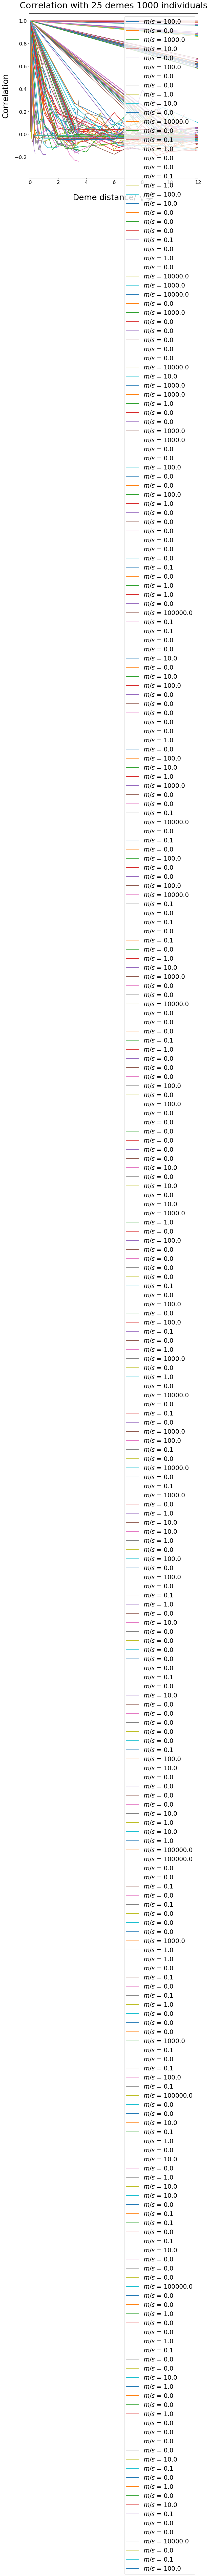

In [83]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
# ratio = np.power([10]*9,np.append([2,1],np.arange(0,7,1)))
# ratio = np.append(ratio[0:3],1/ratio[3:])

ms_vals = [20,10,5,2,1,0.1]
colors = ["b","g","r","c","m","y"]

# for j in range(len(ratio)):
fig = plt.figure(figsize=(12,12))
for i in range(len(slimoutputfiles)):
    numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
    df = genfromtxt(slimoutputfiles[i],delimiter=",")
#         if abs(mu/s) == ratio[j]:
#             if abs(m/s) > 1:
    Rvec = R(df)
    plotlabel = (r"$m/s$ = %.1f"%(abs(m/s)))
    plottitle = (r"Correlation with %d demes %d individuals"%(numdemes,demepopsize))             
    plt.plot(np.arange(numdemes//2 )/np.sqrt(abs(m/s)),Rvec[:len(Rvec[:-1])//2]/Rvec[0],label = plotlabel, lw=2)
    plt.title(plottitle, fontsize=34, pad=20)
    plt.legend(fontsize=24)
    plt.xlabel(r"Deme distance/ $\sqrt{\frac{m}{s}}$", fontsize = 32,labelpad=20)
    plt.ylabel("Correlation", fontsize=32,labelpad=20)
    plt.xlim(-0.1,numdemes//2)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
#                 plt.xlim(-0.1,5.1)
    filename = ("TEST_Cov_distance_plot_musel_%.e_ms_%.e_numreps_100_.eps"%(mu/s,abs(m/s)))

fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)
            
        # r"$\frac{1}{L}\sum{_i}{[\left<f_i*f_{i+d}\right> - \left<f\right>^2]}$

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

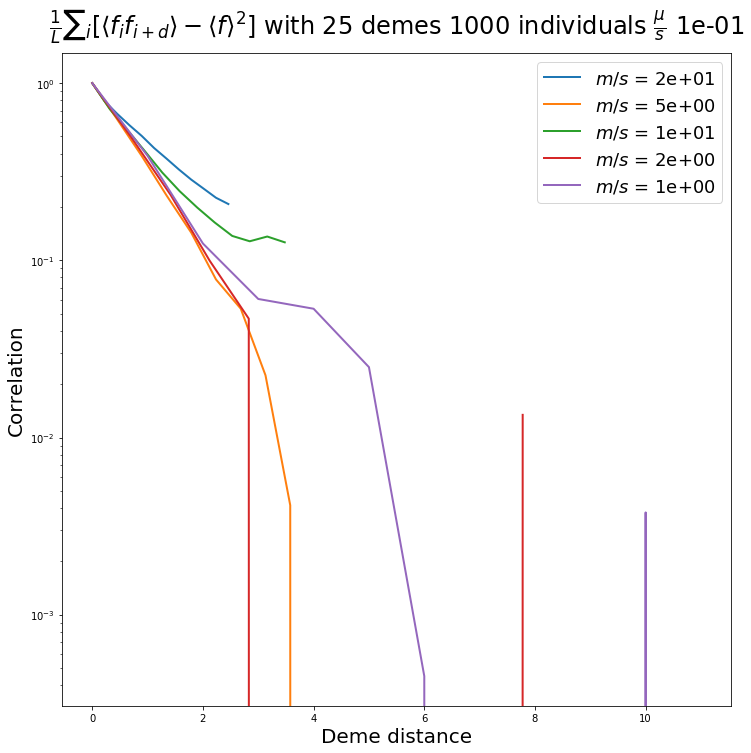

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [15]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
ratio = np.power([10]*9,np.append([2,1],np.arange(0,7,1)))
ratio = np.append(ratio[0:3],1/ratio[3:])

            
for j in range(len(ratio)):
    fig = plt.figure(figsize=(12,12))
    for i in range(len(slimoutputfiles)):
        numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
        df = genfromtxt(slimoutputfiles[i],delimiter=",")
        if abs(mu/s) == ratio[j]:
            Rvec = R(df) 
            plotlabel = (r"$m/s$ = %.e"%(abs(m/s)))
            plottitle = (r"$\frac{1}{L}\sum{_i}{[\left<f_i f_{i+d}\right> - \left<f\right>^2]}$ with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
            plt.semilogy(np.arange(numdemes//2)/np.sqrt(abs(m/s)),Rvec[:len(Rvec[:-1])//2]/Rvec[0],label = plotlabel, lw=2)
            plt.title(plottitle, fontsize=24,pad=20)
            plt.legend(fontsize=18)
            plt.xlabel("Deme distance", fontsize = 20)
            plt.ylabel("Correlation", fontsize=20)
            filename = ("Cov_distance_plot_musel_%.e_ms_%.e_.png"%(mu/s,abs(m/s)))
#               fig.savefig("../../data/figures/"+filename)
        else:
            continue
            
        

### Frequency maps for 25 demes

In [57]:
output_dir = "../../data/outputfiles/freqvecreps/freqvecreps_numdemes*"
nameflag = "100218twentyfivedemerun"

slimoutputfiles = outputparse(output_dir,nameflag)

In [58]:
genfromtxt(slimoutputfiles[0],delimiter=",").shape

(200, 25)

In [48]:
slimoutputfiles

['../../data/outputfiles/freqvecreps/freqvecreps_numdemes_25_demepopsize_1000_m_0.2_mu_0.001_s_-0.01_093018run.csv',
 '../../data/outputfiles/freqvecreps/freqvecreps_numdemes_25_demepopsize_1000_m_0.05_mu_0.001_s_-0.01_093018run.csv',
 '../../data/outputfiles/freqvecreps/freqvecreps_numdemes_25_demepopsize_1000_m_0.1_mu_0.001_s_-0.01_093018run.csv',
 '../../data/outputfiles/freqvecreps/freqvecreps_numdemes_25_demepopsize_1000_m_0.02_mu_0.001_s_-0.01_093018run.csv',
 '../../data/outputfiles/freqvecreps/freqvecreps_numdemes_25_demepopsize_1000_m_0.01_mu_0.001_s_-0.01_093018run.csv']

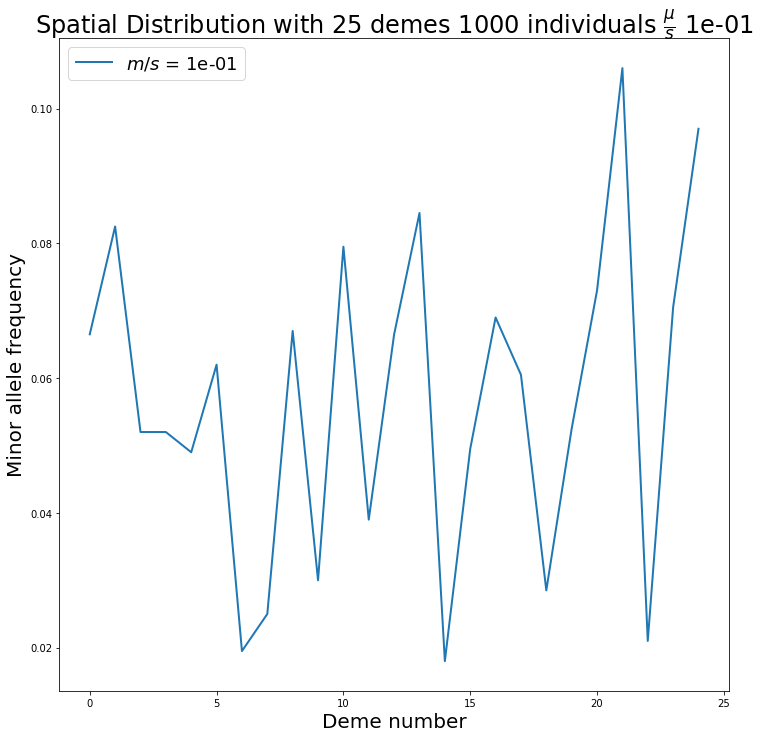

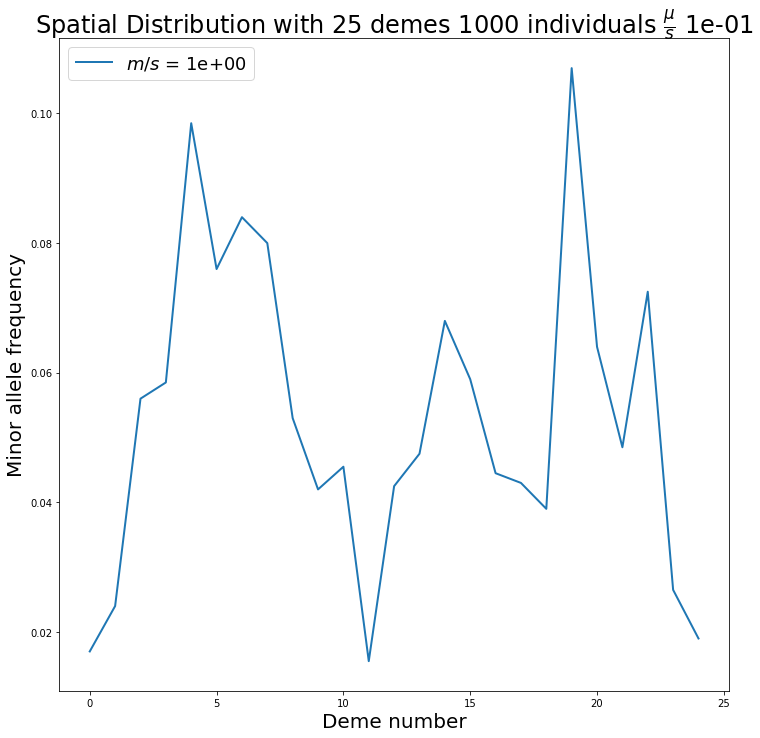

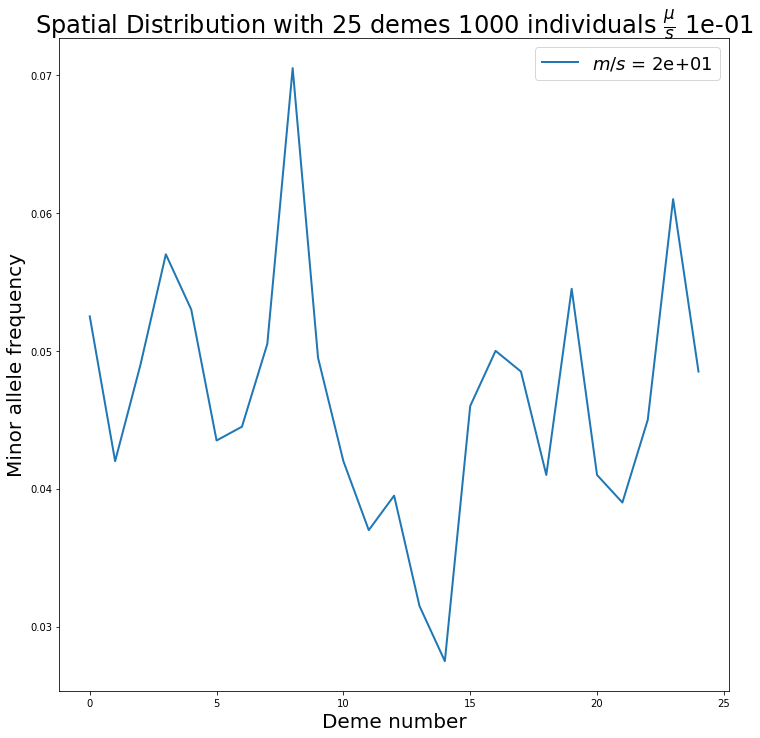

In [32]:
#Overlay R(d) plots for every SLiM output file with chosen m/s and mu/s
ratio = [0.1,1,20]

            
for j in range(len(ratio)):
    fig = plt.figure(figsize=(12,12))
    for i in range(len(slimoutputfiles)):
        numdemes, demepopsize, m, mu, s = paramgrab(slimoutputfiles[i])
#         if abs(mu/s) < 1: ### Choose mu/s > or < 1
#             if abs(m/s) > 1: ## Choose m/s > or < 1
        df = genfromtxt(slimoutputfiles[i],delimiter=",")
#         print(abs(m/s))
        if abs(m/s) == ratio[j]:
            plotlabel = (r"$m/s$ = %.e"%(abs(m/s)))
            plottitle = (r"Spatial Distribution with %d demes %d individuals $\frac{\mu}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s)))             
            plt.plot(df[0,:],label = plotlabel, lw=2)
            plt.title(plottitle, fontsize=24)
            plt.legend(fontsize=18)
            plt.xlabel("Deme number", fontsize = 20)
            plt.ylabel("Minor allele frequency", fontsize=20)
            filename = ("spatial_freq_dist_plot_musel_%.e_ms_%.e_.eps"%(mu/s,abs(m/s)))
            fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)
        else:
            continue
            
  

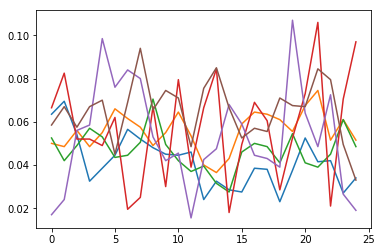

In [25]:
for i in range(len(slimoutputfiles)):
    df = genfromtxt(slimoutputfiles[i],delimiter=",")
    plt.plot(df[0,:])

array([[0.0635, 0.0695, 0.054 , ..., 0.042 , 0.027 , 0.034 ],
       [0.0385, 0.0565, 0.0595, ..., 0.075 , 0.0865, 0.097 ],
       [0.083 , 0.067 , 0.057 , ..., 0.069 , 0.0895, 0.08  ],
       ...,
       [0.057 , 0.05  , 0.0385, ..., 0.057 , 0.0745, 0.099 ],
       [0.0315, 0.0485, 0.0405, ..., 0.039 , 0.066 , 0.0295],
       [0.0475, 0.062 , 0.051 , ..., 0.026 , 0.0435, 0.0585]])

## Visualizing Two-Deme Time series

In [66]:
output_dir = "../../data/outputfiles/timeseries/timeseries_numdemes*"
nameflag = "100118twodemerun"
# nameflag = "092718runtest"

slimoutputfiles = outputparse(output_dir,nameflag)

In [67]:
genfromtxt(slimoutputfiles[0],delimiter=",").shape

(20000, 2)

In [68]:
truthvec = np.zeros(len(slimoutputfiles))
for i in range(len(slimoutputfiles)): 
    timeseries = slimoutputfiles[i]
    numdemes,demepopsize,m,mu,s = paramgrab(timeseries)
    if abs(m/s) == 1:
        truthvec[i] = 1
    else:
        continue

print(np.where(truthvec==1))

(array([  2,   5,   6,   9,  24,  27,  28,  30,  32,  33,  35,  40,  54,
        56,  61,  66,  77,  80,  81,  83,  89,  90, 100, 111, 123, 124,
       128, 131, 132, 135, 136, 138, 139, 141, 143, 149, 160, 168, 171,
       173, 174, 177, 187, 193, 194, 197, 200, 205, 215, 225, 227, 232,
       234, 238, 242, 265, 273, 274, 281, 287, 293, 295, 296, 297, 299,
       309, 316, 317, 321, 324, 329, 330, 331, 336, 337, 338, 359, 360,
       370, 373, 385, 400, 406, 407, 413, 418, 429, 430, 431, 437, 441,
       447, 457, 458, 459, 461, 467, 474, 491, 498]),)


### 2-deme Time series plot for selected m/s

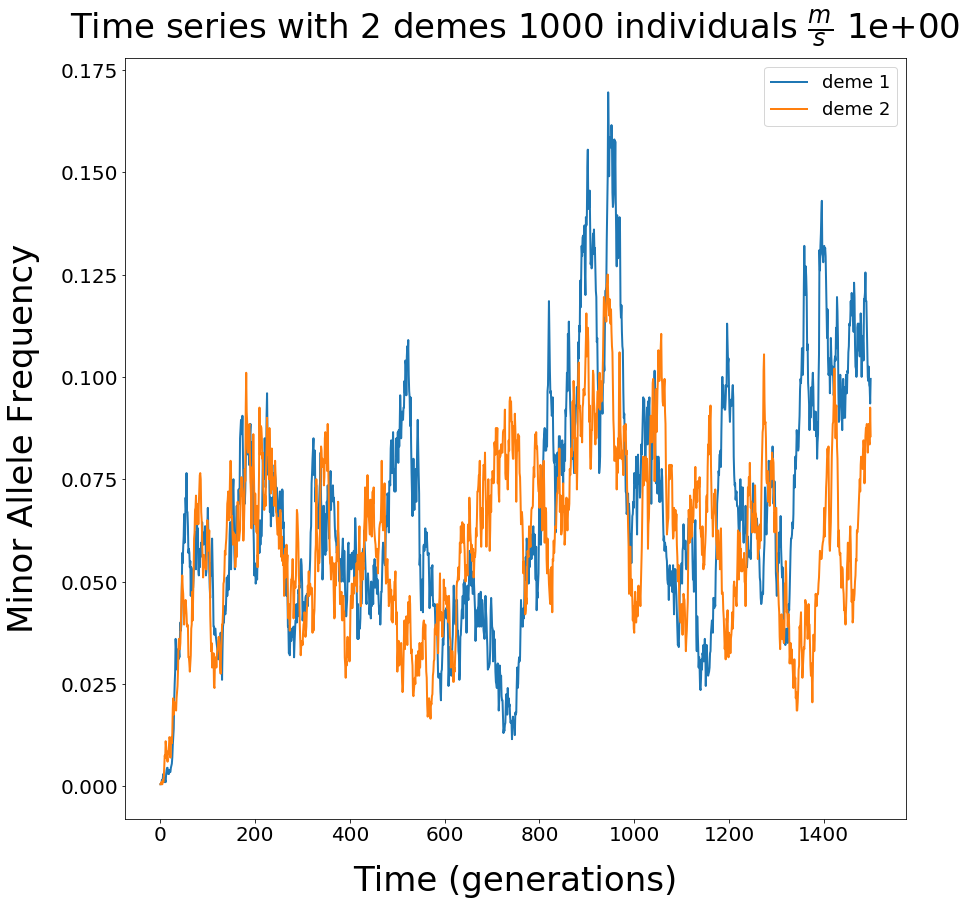

In [78]:
timeseries = slimoutputfiles[27]
numdemes,demepopsize,m,mu,s = paramgrab(timeseries)
fig = plt.figure(figsize=(14,14))
df = genfromtxt(timeseries,delimiter=",")
deme1 = df[:,0]
deme2 = df[:,1]
time = np.arange(df.shape[0])
timerange = range(0,1500)
plottitle = (r"Time series with %d demes %d individuals $\frac{m}{s}$ %.e"%(numdemes,demepopsize,abs(m/s)))             
plt.plot(time[timerange],deme1[timerange],label="deme 1",lw=2)
plt.plot(time[timerange],deme2[timerange],label="deme 2",lw=2)
plt.title(plottitle, fontsize=34,pad=20)
plt.legend(fontsize=18)
plt.xlabel("Time (generations)", fontsize = 34,labelpad=20)
plt.ylabel("Minor Allele Frequency", fontsize=34,labelpad=20)
filename = ("TEST_twodeme_timeseries_plot_musel_%.e_ms_%.e_.eps"%(mu/s,abs(m/s)))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)

### Two-deme correlation plots for selected m/s

In [ ]:
output_dir = "../../data/outputfiles/timeseries/timeseries_numdemes*"
nameflag = "100118twodemerun"

slimoutputfiles = outputparse(output_dir,nameflag)

In [ ]:
len(slimoutputfiles)

In [ ]:
genfromtxt(slimoutputfiles[0],delimiter=",").shape

In [55]:
truthvec = np.zeros(len(slimoutputfiles))
for i in range(len(slimoutputfiles)): 
    timeseries = slimoutputfiles[i]
    numdemes,demepopsize,m,mu,s = paramgrab(timeseries)
    if abs(m/s) == 1e+00:
        truthvec[i] = 1
    else:
        continue

print(np.where(truthvec==1))

(array([  2,   5,   6,   9,  24,  27,  28,  30,  32,  33,  35,  40,  54,
        56,  61,  66,  77,  80,  81,  83,  89,  90, 100, 111, 123, 124,
       128, 131, 132, 135, 136, 138, 139, 141, 143, 149, 160, 168, 171,
       173, 174, 177, 187, 193, 194, 197, 200, 205, 215, 225, 227, 232,
       234, 238, 242, 265, 273, 274, 281, 287, 293, 295, 296, 297, 299,
       309, 316, 317, 321, 324, 329, 330, 331, 336, 337, 338, 359, 360,
       370, 373, 385, 400, 406, 407, 413, 418, 429, 430, 431, 437, 441,
       447, 457, 458, 459, 461, 467, 474, 491, 498]),)


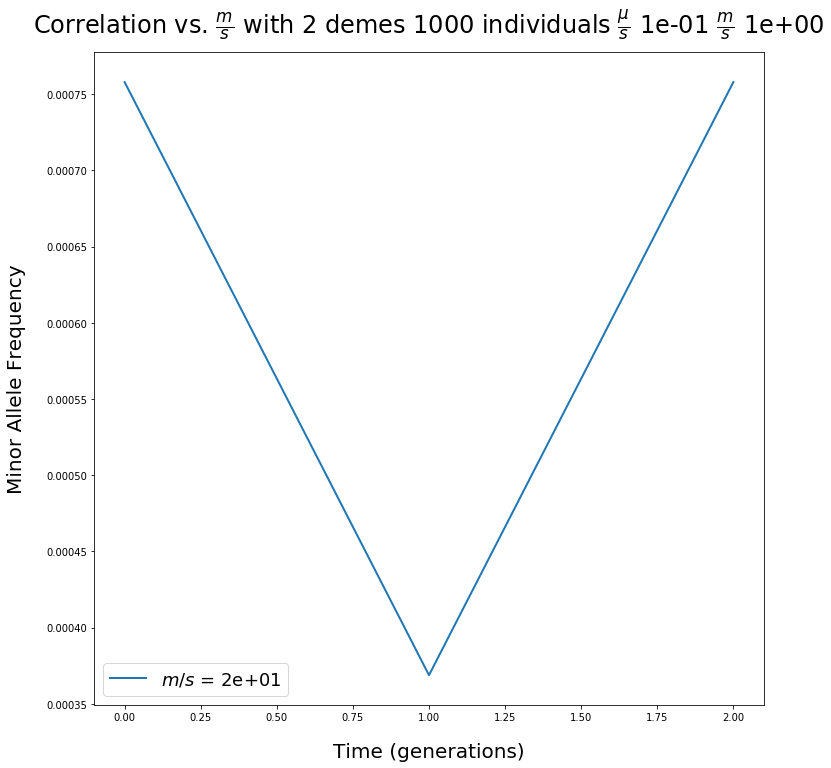

In [57]:
timeseries = slimoutputfiles[28]
numdemes,demepopsize,m,mu,s = paramgrab(timeseries)
fig = plt.figure(figsize=(12,12))
df = genfromtxt(timeseries,delimiter=",")
Rvec = R(df)
plottitle = (r"Correlation vs. $\frac{m}{s}$ with %d demes %d individuals $\frac{\mu}{s}$ %.e $\frac{m}{s}$ %.e"%(numdemes,demepopsize,abs(mu/s),abs(m/s)))             
plt.plot(Rvec,label=plotlabel,lw=2)
plt.title(plottitle, fontsize=24,pad=20)
plt.legend(fontsize=18)
plt.xlabel("Time (generations)", fontsize = 20,labelpad=20)
plt.ylabel("Minor Allele Frequency", fontsize=20,labelpad=20)
filename = ("twodeme_timeseries_plot_musel_%.e_ms_%.e_.eps"%(mu/s,abs(m/s)))
plt.show()

# fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)

In [98]:
R(df)[1]/R(df)[0]

0.48664168553230835

In [99]:
df = np.zeros((len(slimoutputfiles),2))
for i in range(len(slimoutputfiles)):
    timeseries = genfromtxt(slimoutputfiles[i],delimiter=",")
    numdemes,demepopsize,m,mu,s = paramgrab(slimoutputfiles[i])
    df[i,0] = R(timeseries)[1]/R(timeseries)[0]
    df[i,1] = abs(m/s)

In [96]:
range(len(slimoutputfiles))

range(0, 500)

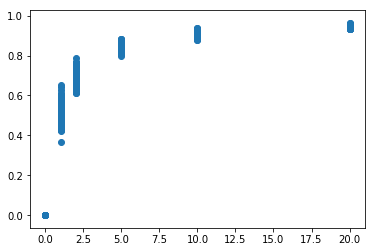

In [17]:
plt.scatter(df[:,1],df[:,0])

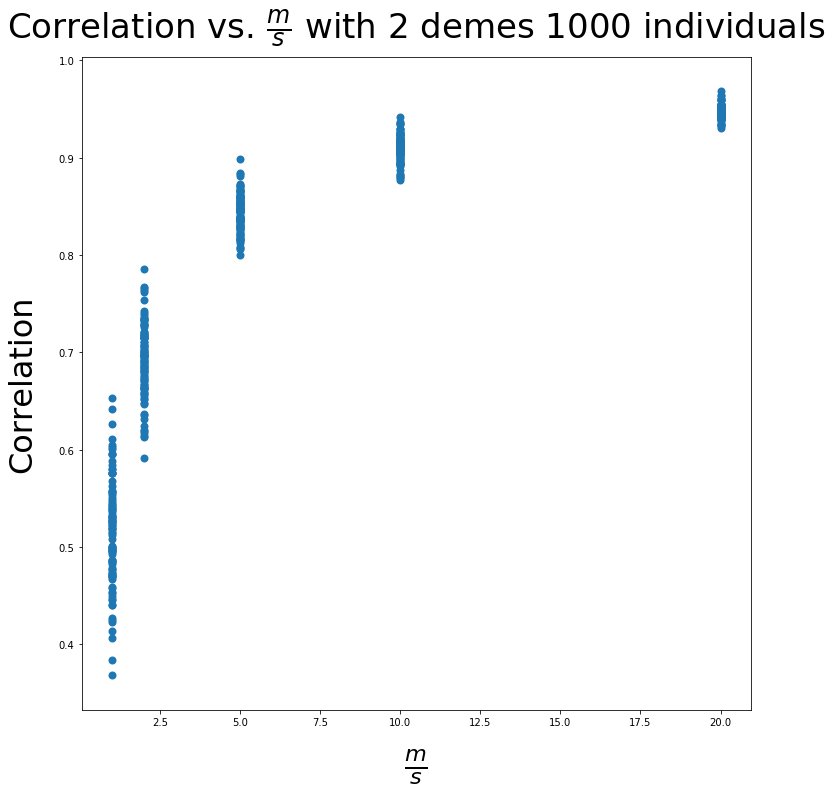

In [102]:
fig = plt.figure(figsize=(12,12))
plottitle = (r"Correlation vs. $\frac{m}{s}$ with %d demes %d individuals"%(numdemes,demepopsize))             
plt.scatter(df[:,1],df[:,0],lw=2)
plt.title(plottitle, fontsize=34,pad=20)
plt.xlabel(r"$\frac{m}{s}$", fontsize = 32,labelpad=20)
plt.ylabel("Correlation", fontsize=32,labelpad=20)
filename = ("twodeme_timeseries_corr_plot_musel_%.e_.eps"%(mu/s))
plt.show()

fig.savefig("../../data/figures/"+filename, format='eps', dpi=1000)